In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h1 align="center"><b><u>Lecture 3 - Lebesgue Integral and Measure </u></b></h1>

The example of pointwise convergence not preserving continuity is shown below.  The sequence of functions are defined by the integer $n$ as:

$$
f_n(x) = x^n
$$

In [2]:
fn = lambda x,n: pow(x,n)

which converges to 

$$
f(x) = 
\lim_{n\rightarrow\infty} f_n(x) = 
\begin{cases}
0 \text{    for } 0 \leq x < 1\\
1 \text{    at } x=1
\end{cases}
$$

This is not a continuous function, and the convergence to this function is seen in the plot below.

An example of uniform convergence is given for comparison, using the function $g_n$ as defined below.

$$
g_n(x) = x/n, \quad x\in[0,1]
$$

In [3]:
gn = lambda x,n: x/n

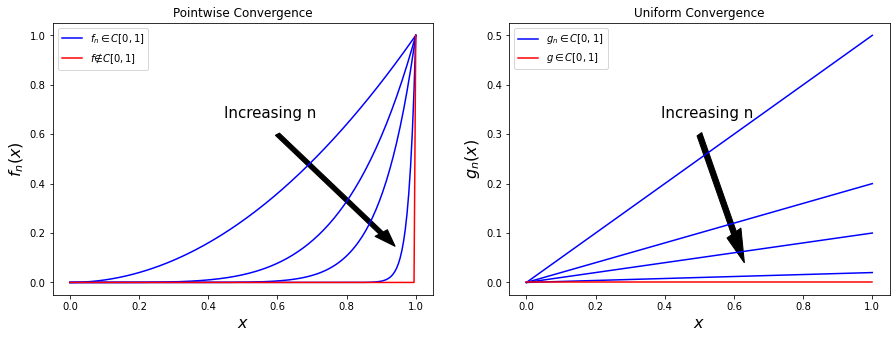

In [4]:
## Plotting
x = np.linspace(0,1,200)

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,5))

ax[0].plot(x,fn(x,2),color='b')
ax[0].plot(x,fn(x,5),color='b')
ax[0].plot(x,fn(x,10),color='b')
ax[0].plot(x,fn(x,50),color='b',label=r"$f_n \in C[0,1]$")
y = np.zeros(200)
y[-1] = 1
ax[0].plot(x,y,color='r',label=r"$f \notin C[0,1]$")
ax[0].arrow(0.6,0.6,0.3,-0.4,color='k',width=0.015)
ax[0].annotate("Increasing n",xy=(0.45,0.65),xycoords="axes fraction",fontsize=15)
ax[0].set_xlabel(r"$x$",fontsize=16)
ax[0].set_ylabel(r"$f_n(x)$",fontsize=16)
ax[0].set_title("Pointwise Convergence")
ax[0].legend()

ax[1].plot(x,gn(x,2),color='b')
ax[1].plot(x,gn(x,5),color='b')
ax[1].plot(x,gn(x,10),color='b')
ax[1].plot(x,gn(x,50),color='b',label=r"$g_n \in C[0,1]$")
y = np.zeros(200)
ax[1].plot(x,y,color='r',label=r"$g \in C[0,1]$")
ax[1].arrow(0.5,0.3,0.1,-0.2,color='k',width=0.015)
ax[1].annotate("Increasing n",xy=(0.4,0.65),xycoords="axes fraction",fontsize=15)
ax[1].set_xlabel(r"$x$",fontsize=16)
ax[1].set_ylabel(r"$g_n(x)$",fontsize=16)
ax[1].set_title("Uniform Convergence")
ax[1].legend()
plt.show()

Now to demonstrate the problem seen in the lectures.  The function series $f_n$ is given by:

$$
f_n(x) = 2n^2x\exp(-n^2x^2)
$$
on $[0,1], \forall n$.  Now considering taking the limit after the integral, we must find:

$$
\lim_{n\rightarrow \infty} \int_0^1 f_n(x)dx = \lim_{n\rightarrow \infty} \int_0^1 2n^2x\exp(-n^2x^2) dx = \lim_{n\rightarrow \infty} \left[ -\exp(-n^2x^2) \right]_{0}
^{1} = \lim_{n\rightarrow \infty} (1-\exp(-n^2)) = 1
$$

The value of the integral tending to 1 is shown in the graph below.

In [5]:
func = lambda n: 1-np.exp(-pow(n,2)) 

In [6]:
x = np.arange(1,6)
y = func(x)

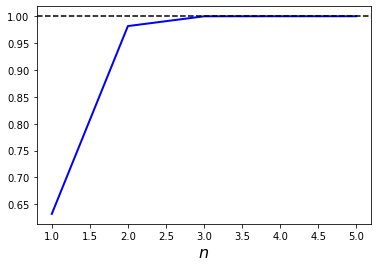

In [7]:
plt.plot(x,y,color='b',linewidth=2)
plt.axhline(1,color='k',linestyle='--')
plt.xlabel(r"$n$",fontsize=16)
plt.show()

If the limit is taken before the integral the value is zero.  A subset of integrands with different $n$ are shown below.  The resulting integral for the limit $n\rightarrow\infty$ is zero. 

$$\int_{0}^{1}\lim_{n\rightarrow \infty}f_{n}(x)dx = \int_{0}^{1} 0 dx = 0 $$

In [8]:
def fn(x,n): return 2*pow(n,2)*x*np.exp(-pow(n*x,2))

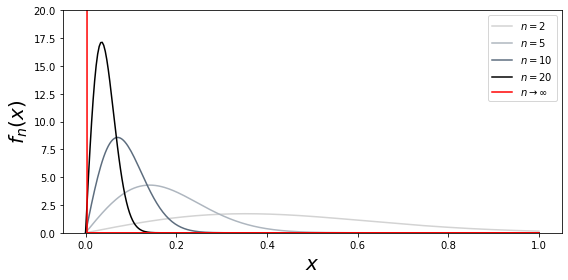

In [9]:
x = np.linspace(0,1,300)
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(8,4))
ax.plot(x,fn(x,2),color='lightgray',label=r"$n=2$")
ax.plot(x,fn(x,5),color='#AEB6BF',label=r"$n=5$")
ax.plot(x,fn(x,10),color='#5D6D7E',label=r"$n=10$")
ax.plot(x,fn(x,20),color='k',label=r"$n=20$")
fi = np.zeros(300)
fi[0] = 1000 # i.e. very large compared to current limits
ax.plot(x,fi,color='r',label=r"$n\rightarrow \infty$")
ax.set_xlabel(r"$x$",fontsize=20)
ax.set_ylabel(r"$f_n(x)$",fontsize=20)
ax.set_ylim([0,20])
plt.tight_layout()
plt.legend()
plt.show()

<h1 align="center"><b><u>Lecture 3 - Riemann Integration </u></b></h1>

Consider the function $f(x)$ as defined below:

In [10]:
g = lambda x, m, s: (1/(s*np.sqrt(2*np.pi))) * np.exp(-(1/(2*pow(s,2)))*pow(x-m,2))

f = lambda x: g(x, 1/3, 0.1) + 0.5*g(x, 2/3, 0.1)

The Riemann integral of this funciton will be illustrated, as well as showing the convergence of the upper and lower Riemann sums as defined in lectures. Firstly, the domain of integration $x\in[0,1]$ will be partitioned into $N$ equal intervals $[x_i,x_{i+1}]$.

In [11]:
N = 20
x = np.linspace(0,1,N+1)

The function below returns the area of a rectangle defined by the inteval $[x_i,x_{i+1}]$ and either $\underset{x\in [x_i,x_{i+1}]}{\text{inf}} f(x)$ for the lower Riemann sum, or $\underset{x\in [x_i,x_{i+1}]}{\text{sup}} f(x)$ for the upper Riemann sum.

In [12]:
def box(xl, xu, f, lower=True, plot=True, axis=None):
    x_eval = np.linspace(xl,xu,300)
    if lower:
        height = min(f(x_eval))
    else:
        height = max(f(x_eval))
    if plot:
        axis.vlines(xl,0,height,'k')
        axis.vlines(xu,0,height,'k')
        axis.hlines(height,xl,xu,'k')
        axis.fill_between((xl,xu),(height,height),color='k',alpha=0.1)
    
    area = height*(xu-xl) 
    return area

Below is an illustration of the Riemann inegr

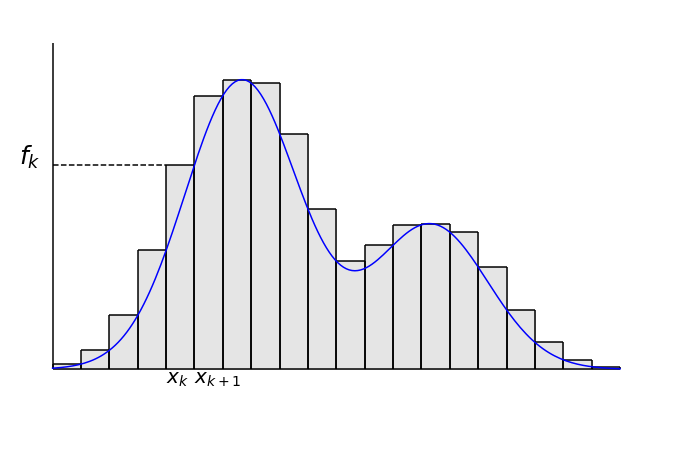

In [13]:
## Plotting
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,8))
v = np.linspace(0,1,200)
ax.plot(v,f(v),color='blue')
ax.vlines(0,0,4.5,color='k')
ax.hlines(0,0,1,color='k')
N = 20
x = np.linspace(0,1,N+1)
for i in range(20):
    _ = box(x[i], x[i+1], f, lower=False, plot=True, axis=ax)

ax.annotate('$x_k$',(x[4],-0.2), fontsize=20)
ax.annotate('$x_{k+1}$',(x[5],-0.2), fontsize=20)
ax.annotate('$f_{k}$',(-0.06,f(x[5])),fontsize=25)
ax.hlines(f(x[5]),0,x[4],color='k',linestyle='--')
ax.set_xlim(-0.08,1.1)
ax.set_ylim(-1,5)
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')
plt.show()

The lower and upper Riemann sums are illustrated below - adjust the value of N, the number of partitions to see the effect on the Riemann sums.

In [14]:
N = 20
x = np.linspace(0,1,N+1)

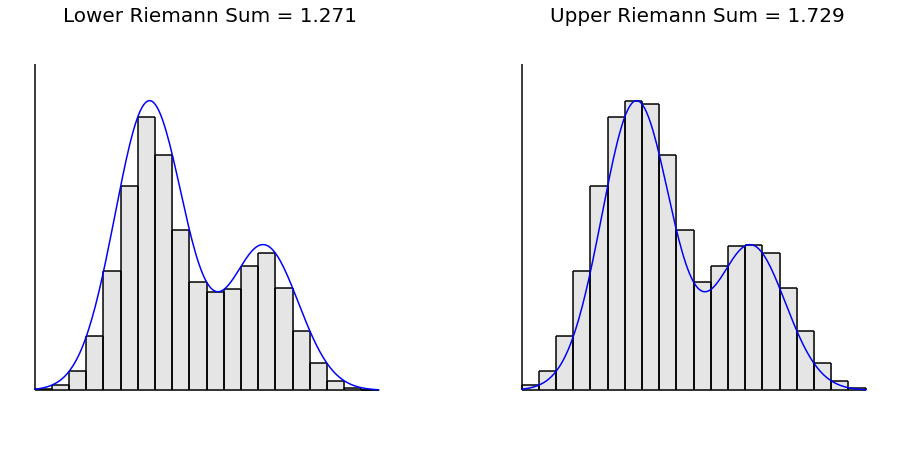

In [15]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(16,8))
for axi in ax:
    axi.plot(v,f(v),color='blue')
    axi.vlines(0,0,4.5,color='k')
    axi.hlines(0,0,1,color='k')

riemann_lower = 0
riemann_upper = 0

for i in range(N):
    riemann_lower += box(x[i], x[i+1], f, lower=True, plot=True, axis=ax[0])
    riemann_upper += box(x[i], x[i+1], f, lower=False, plot=True, axis=ax[1])


# Set limits to limits of integration
for axi in ax:
    axi.set_xlim(-0.08,1.1)
    axi.set_ylim(-1,5)
    axi.set_xticks([])
    axi.set_yticks([])
    axi.axis('off')
ax[0].set_title('Lower Riemann Sum = {0:.3f}'.format(riemann_lower), fontsize=20)
ax[1].set_title('Upper Riemann Sum = {0:.3f}'.format(riemann_upper), fontsize=20)

plt.show()

Observe the convergence of the lower and upper Riemann sums to the same value - what property of the function is causing this to happen?

In [16]:
# Riemann integration

Ns = np.logspace(0,3,20)
RU = []
RL = []
Ns = np.floor(Ns)
Ns = [np.int(Nsi) for Nsi in Ns]
for N in Ns:
    v = np.linspace(0,1,N+1)
    riemann_lower = 0
    riemann_upper = 0
    for i in range(N):
        riemann_lower += box(v[i], v[i+1], f, lower=True, plot=False)
        riemann_upper += box(v[i], v[i+1], f, lower=False, plot=False)
    RL.append(riemann_lower)
    RU.append(riemann_upper)

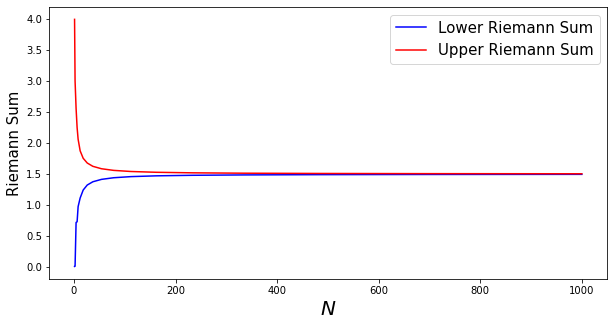

In [17]:
## Plotting
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(Ns,RL,color='b', label='Lower Riemann Sum')
ax.plot(Ns,RU,color='r', label='Upper Riemann Sum')
ax.set_xlabel('$N$',fontsize=20)
ax.set_ylabel('Riemann Sum',fontsize=15)
plt.legend(fontsize=15)
plt.show()